# Actual Versus Ideal Weight

Data set from https://github.com/Thinkful-Ed/curric-data-001-data-sets/blob/master/ideal-weight/ideal_weight.csv

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
weight = pd.read_csv('ideal_weight.csv')

In [3]:
weight.head()

,'id','sex','actual','ideal','diff'
0,0,'Male',215,190,25
1,1,'Female',155,135,20
2,2,'Male',195,155,40
3,3,'Female',145,130,15
4,4,'Female',110,100,10


In [10]:
weight.loc[0]

'id'             0
'sex'       'Male'
'actual'       215
'ideal'        190
'diff'          25
Name: 0, dtype: object

## Data Cleaning and Exploration

In [5]:
weight.columns

Index([u''id'', u''sex'', u''actual'', u''ideal'', u''diff''], dtype='object')

In [14]:
# Remove the single quotes from the column names.
weight.columns = weight.columns.map(lambda x: (x.replace("'", '')))

In [17]:
# Remove the single quotes from the "sex" column.
weight['sex'] = weight['sex'].map(lambda x: (x.replace("'", '')))

In [18]:
weight.head()

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10


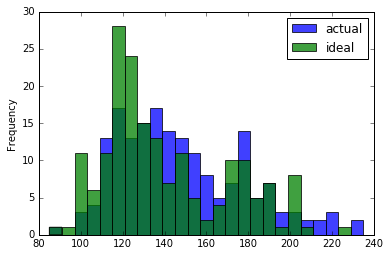

In [49]:
# Plot the distributions of actual weight and ideal weight.
weight[['actual', 'ideal']].plot(kind='hist', bins=25, alpha=0.75)

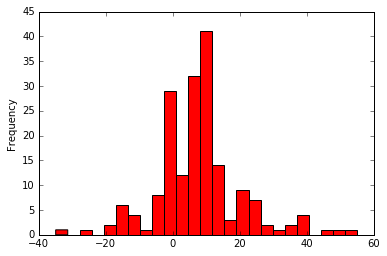

In [46]:
# Plot the distributions of difference in weight.
weight['diff'].plot(kind='hist', bins=25, color='red')

In [64]:
# Map "sex" to a categorical variable.
weight['sex'] = weight['sex'].astype('category')

In [67]:
# Are there more women or men in the dataset? Yes
weight['sex'].value_counts()

Female    119
Male       63
dtype: int64

In [72]:
# Fit a Naive Bayes classifier of sex to actual weight, ideal weight, and diff.
X = weight[['actual', 'ideal', 'diff']]
Y = weight['sex']
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [81]:
# How many points were mislabeled? How many points were there in the dataset, total?
clf.score(X, Y)

0.92307692307692313

In [82]:
X.shape

(182, 3)

In [83]:
0.92307692307692313*182

168.0

In [79]:
182-168

14

In [84]:
# Predict the sex for an actual weight of 145, an ideal weight of 160, and a diff of -15.
print(clf.predict([[140, 160, -15]]))

['Male']


In [85]:
# Predict the sex for an actual weight of 160, an ideal weight of 145, and a diff of 15.
print(clf.predict([[160, 145, 15]]))

['Female']
